# 지하철 각 노선별 최대 하차 인원을 막대그래프로 표시하고, 하차인원 출력

In [201]:
import platform
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
system_name = platform.system()
if system_name == 'Windows':
# Windows 운영체제
    print('Windows OS')
    plt.rc('font', family='Malgun Gothic')
elif system_name == 'Darwin': # Mac OS print('Mac OS')
    plt.rc('font', family='AppleGothic')
    print('Mac OS')
elif system_name == 'Linux': # Linux
    print('Linux OS')
    path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
    font_name=fm.FontProperties(fname=path, size=12)
    plt.rc('font', family=font_name)
else:
    print("Not support")

Mac OS


In [82]:
import pandas as pd
import numpy as np

subDF = pd.read_excel('../Data/subway.xls', sheet_name='지하철 시간대별 이용현황', header=[0,1])
subDF

사용월                호선명                역ID  \
    Unnamed: 0_level_1 Unnamed: 1_level_1 Unnamed: 2_level_1   
0              2022-06                1호선                150   
1              2022-06                1호선                151   
2              2022-06                1호선                152   
3              2022-06                1호선                153   
4              2022-06                1호선                154   
..                 ...                ...                ...   
610            2022-06                신림선               4407   
611            2022-06                신림선               4408   
612            2022-06                신림선               4409   
613            2022-06                신림선               4410   
614            2022-06                신림선               4411   

                  지하철역 04:00:00~04:59:59     05:00:00~05:59:59         \
    Unnamed: 3_level_1                승차  하차                승차     하차   
0                  서울역               646  24             8,433  7,694   
1                   시청               271   7             3,133  4,802   
2                   종각                91   9             4,007  3,960   
3                 종로3가               190  12             3,882  3,261   
4                 종로5가                34   0             1,730  3,909   
..                 ...               ...  ..               ...    ...   
610                 당곡                 0   0             1,061    118   
611                 신림                 2   1               651    153   
612                 서원                 2   1             1,287    151   
613            서울대벤처타운                10   3             3,314    166   
614           관악산(서울대)                 2   5               475    742   

    06:00:00~06:59:59          ... 23:00:00~23:59:59 00:00:00~00:59:59         \
                   승차      하차  ...                하차                승차     하차   
0              12,608  46,963  ...            15,480               158  1,332   
1               3,321  23,621  ...             2,938                72    422   
2               3,682  22,533  ...             3,590               315    394   
3               3,570  14,038  ...             4,119               310    843   
4               2,986  16,406  ...             2,628                98    668   
..                ...     ...  ...               ...               ...    ...   
610             2,650     704  ...             2,710               156    637   
611               853     488  ...             2,023               177    629   
612             2,552     513  ...             3,281                68    782   
613             5,162   1,676  ...             7,279               180  1,974   
614             1,258   1,712  ...             1,224                90    412   

    01:00:00~01:59:59     02:00:00~02:59:59    03:00:00~03:59:59     \
                   승차  하차                승차 하차                승차 하차   
0                   1   4                 0  1                 0  0   
1                   0   2                 0  0                 0  0   
2                   0   1                 0  0                 0  0   
3                   3   3                 0  0                 0  0   
4                   0   0                 0  0                 0  0   
..                ...  ..               ... ..               ... ..   
610                 0   0                 0  0                 0  0   
611                 0   1                 0  0                 0  0   
612                 2   2                 0  0                 0  0   
613                 1  40                 0  0                 0  0   
614                 1  33                 0  0                 0  0   

                    작업일시  
     Unnamed: 52_level_1  
0    2022-07-03 09:48:05  
1    2022-07-03 09:48:05  
2    2022-07-03 09:48:05  
3    2022-07-03 09:48:05  
4    2022-07-03 09:48:05  
..                   ...  
610  2022-07-03 09:48:05  
611  2022-07-03

In [6]:
subDF.head(10)

사용월                호선명                역ID               지하철역  \
  Unnamed: 0_level_1 Unnamed: 1_level_1 Unnamed: 2_level_1 Unnamed: 3_level_1   
0            2022-06                1호선                150                서울역   
1            2022-06                1호선                151                 시청   
2            2022-06                1호선                152                 종각   
3            2022-06                1호선                153               종로3가   
4            2022-06                1호선                154               종로5가   
5            2022-06                1호선                155                동대문   
6            2022-06                1호선                156                신설동   
7            2022-06                1호선                157                제기동   
8            2022-06                1호선                158       청량리(서울시립대입구)   
9            2022-06                1호선                159                동묘앞   

  04:00:00~04:59:59     05:00:00~05:59:59        06:00:00~06:59:59          \
                 승차  하차                승차     하차                승차      하차   
0               646  24             8,433  7,694            12,608  46,963   
1               271   7             3,133  4,802             3,321  23,621   
2                91   9             4,007  3,960             3,682  22,533   
3               190  12             3,882  3,261             3,570  14,038   
4                34   0             1,730  3,909             2,986  16,406   
5               890  31            11,300  2,056             8,821   7,698   
6               370  19             8,467  2,653             8,568  11,348   
7               441   2             4,888  2,214             8,551   9,419   
8               887  14            10,765  4,593            14,934  22,471   
9               170   3             2,827  1,104             3,321   5,042   

   ... 23:00:00~23:59:59 00:00:00~00:59:59        01:00:00~01:59:59      \
   ...                하차                승차     하차                승차  하차   
0  ...            15,480               158  1,332                 1   4   
1  ...             2,938                72    422                 0   2   
2  ...             3,590               315    394                 0   1   
3  ...             4,119               310    843                 3   3   
4  ...             2,628                98    668                 0   0   
5  ...             8,677                25  1,595                 0   0   
6  ...             7,832               232  1,578                 1  12   
7  ...             6,711                42    780                 1   1   
8  ...             9,765                84  1,613                 0   0   
9  ...             3,604                31  2,129                 0   0   

  02:00:00~02:59:59    03:00:00~03:59:59                    작업일시  
                 승차 하차                승차 하차  Unnamed: 52_level_1  
0                 0  1                 0  0  2022-07-03 09:48:05  
1                 0  0                 0  0  2022-07-03 09:48:05  
2                 0  0                 0  0  2022-07-03 09:48:05  
3                 0  0                 0  0  2022-07-03 09:48:05  
4                 0  0                 0  0  2022-07-03 09:48:05  
5                 0  0                 0  0  2022-07-03 09:48:05  
6                 0  0                 0  0  2022-07-03 09:48:05  
7                 0  0                 0  0  2022-07-03 09:48:05  
8                 0  0                 0  0  2022-07-03 09:48:05  
9                 1  0                 0  0  2022-07-03 09:48:05  

[10 rows x 53 columns]

In [16]:
subDF_time = subDF.iloc[:, [1, 3, 11, 13]]
subDF_time

,호선명,지하철역,07:00:00~07:59:59,08:00:00~08:59:59
,Unnamed: 1_level_1,Unnamed: 3_level_1,하차,하차
0,1호선,서울역,"100,397","201,687"
1,1호선,시청,"62,427","179,710"
2,1호선,종각,"95,376","235,160"
3,1호선,종로3가,"25,469","68,699"
4,1호선,종로5가,"41,304","96,113"
...,...,...,...,...
610,신림선,당곡,"1,981","5,511"
611,신림선,신림,"1,075","1,704"
612,신림선,서원,977,"1,319"


In [17]:
subDF_time.dtypes

호선명                Unnamed: 1_level_1    object
지하철역               Unnamed: 3_level_1    object
07:00:00~07:59:59  하차                    object
08:00:00~08:59:59  하차                    object
dtype: object

In [20]:
subDF_time[
    ('07:00:00~07:59:59', '하차')] = subDF_time[('07:00:00~07:59:59', '하차')].apply(lambda x : x.replace(',',''))
subDF_time[
    ('08:00:00~08:59:59', '하차')] = subDF_time[('08:00:00~08:59:59', '하차')].apply(lambda x : x.replace(',',''))
subDF_time

/var/folders/xc/_mx2j_51031_00cbdpjqryy00000gn/T/ipykernel_13293/995906947.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subDF_time[
/var/folders/xc/_mx2j_51031_00cbdpjqryy00000gn/T/ipykernel_13293/995906947.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subDF_time[


,호선명,지하철역,07:00:00~07:59:59,08:00:00~08:59:59
,Unnamed: 1_level_1,Unnamed: 3_level_1,하차,하차
0,1호선,서울역,100397,201687
1,1호선,시청,62427,179710
2,1호선,종각,95376,235160
3,1호선,종로3가,25469,68699
4,1호선,종로5가,41304,96113
...,...,...,...,...
610,신림선,당곡,1981,5511
611,신림선,신림,1075,1704
612,신림선,서원,977,1319


In [21]:
subDF_time = subDF_time.astype({('07:00:00~07:59:59', '하차'):'int64'})
subDF_time = subDF_time.astype({('08:00:00~08:59:59', '하차'):'int64'})
subDF_time.dtypes

호선명                Unnamed: 1_level_1    object
지하철역               Unnamed: 3_level_1    object
07:00:00~07:59:59  하차                     int64
08:00:00~08:59:59  하차                     int64
dtype: object

In [22]:
subDF_sum = subDF_time.sum(axis=1, numeric_only=True)
subDF_sum

0      302084
1      242137
2      330536
3       94168
4      137417
        ...  
610      7492
611      2779
612      2296
613     10140
614     12730
Length: 615, dtype: int64

In [49]:
subDF_sum

0      302084
1      242137
2      330536
3       94168
4      137417
        ...  
610      7492
611      2779
612      2296
613     10140
614     12730
Length: 615, dtype: int64

In [122]:
subDF_time

,호선명,지하철역,07:00:00~07:59:59,08:00:00~08:59:59
,Unnamed: 1_level_1,Unnamed: 3_level_1,하차,하차
0,1호선,서울역,100397,201687
1,1호선,시청,62427,179710
2,1호선,종각,95376,235160
3,1호선,종로3가,25469,68699
4,1호선,종로5가,41304,96113
...,...,...,...,...
610,신림선,당곡,1981,5511
611,신림선,신림,1075,1704
612,신림선,서원,977,1319


In [321]:
subDF_c=pd.concat([subDF_time, subDF_sum], axis=1)
subDF_c

,"(호선명, Unnamed: 1_level_1)","(지하철역, Unnamed: 3_level_1)","(07:00:00~07:59:59, 하차)","(08:00:00~08:59:59, 하차)",0
0,1호선,서울역,100397,201687,302084
1,1호선,시청,62427,179710,242137
2,1호선,종각,95376,235160,330536
3,1호선,종로3가,25469,68699,94168
4,1호선,종로5가,41304,96113,137417
...,...,...,...,...,...
610,신림선,당곡,1981,5511,7492
611,신림선,신림,1075,1704,2779
612,신림선,서원,977,1319,2296
613,신림선,서울대벤처타운,3834,6306,10140


In [323]:
for i in range(1, 8):
    subDF_c_i=subDF_c[subDF_c[('호선명', 'Unnamed: 1_level_1')]==str(i)+'호선']
    

  (호선명, Unnamed: 1_level_1) (지하철역, Unnamed: 3_level_1)  \
0                       1호선                        서울역   
1                       1호선                         시청   
2                       1호선                         종각   
3                       1호선                       종로3가   
4                       1호선                       종로5가   
5                       1호선                        동대문   
6                       1호선                        신설동   
7                       1호선                        제기동   
8                       1호선               청량리(서울시립대입구)   
9                       1호선                        동묘앞   

   (07:00:00~07:59:59, 하차)  (08:00:00~08:59:59, 하차)       0  
0                   100397                   201687  302084  
1                    62427                   179710  242137  
2                    95376                   235160  330536  
3                    25469                    68699   94168  
4                    41304                    96113

In [327]:
subDF_c_1=subDF_c[subDF_c[('호선명', 'Unnamed: 1_level_1')]=='1호선']

In [328]:
subDF_c_2=subDF_c[subDF_c[('호선명', 'Unnamed: 1_level_1')]=='2호선']

In [329]:
subDF_c_3=subDF_c[subDF_c[('호선명', 'Unnamed: 1_level_1')]=='3호선']

In [330]:
subDF_c_4=subDF_c[subDF_c[('호선명', 'Unnamed: 1_level_1')]=='4호선']

In [331]:
subDF_c_5=subDF_c[subDF_c[('호선명', 'Unnamed: 1_level_1')]=='5호선']

In [332]:
subDF_c_6=subDF_c[subDF_c[('호선명', 'Unnamed: 1_level_1')]=='6호선']

In [333]:
subDF_c_7=subDF_c[subDF_c[('호선명', 'Unnamed: 1_level_1')]=='7호선']

In [ ]:
for i in range(1, 8):
    subDF_c_i=

In [302]:
subDF_c_1_1=subDF_c.iloc[subDF_c_1[0].idxmax(),[0,1,4]]
subDF_c_1_1

(호선명, Unnamed: 1_level_1)        1호선
(지하철역, Unnamed: 3_level_1)        종각
0                             330536
Name: 2, dtype: object

In [303]:
subDF_c_2_1=subDF_c.iloc[subDF_c_2[0].idxmax(),[0,1,4]]
subDF_c_2_1

(호선명, Unnamed: 1_level_1)        2호선
(지하철역, Unnamed: 3_level_1)        역삼
0                             479969
Name: 30, dtype: object

In [304]:
subDF_c_3_1=subDF_c.iloc[subDF_c_3[0].idxmax(),[0,1,4]]
subDF_c_3_1

(호선명, Unnamed: 1_level_1)          3호선
(지하철역, Unnamed: 3_level_1)    양재(서초구청)
0                               331279
Name: 83, dtype: object

In [305]:
subDF_c_4_1=subDF_c.iloc[subDF_c_4[0].idxmax(),[0,1,4]]
subDF_c_4_1

(호선명, Unnamed: 1_level_1)        4호선
(지하철역, Unnamed: 3_level_1)       충무로
0                             208776
Name: 108, dtype: object

In [309]:
subDF_c_5

(호선명, Unnamed: 1_level_1)        5호선
(지하철역, Unnamed: 3_level_1)       여의도
0                             352602
Name: 396, dtype: object

In [335]:
subDF_c_5_1=subDF_c.iloc[subDF_c_5[0].idxmax(),[0,1,4]]
subDF_c_5_1

(호선명, Unnamed: 1_level_1)        5호선
(지하철역, Unnamed: 3_level_1)       여의도
0                             352602
Name: 396, dtype: object

In [336]:
subDF_c_6_1=subDF_c.iloc[subDF_c_6[0].idxmax(),[0,1,4]]
subDF_c_6_1

(호선명, Unnamed: 1_level_1)        6호선
(지하철역, Unnamed: 3_level_1)        공덕
0                             134342
Name: 452, dtype: object

In [337]:
subDF_c_7_1=subDF_c.iloc[subDF_c_7[0].idxmax(),[0,1,4]]
subDF_c_7_1

(호선명, Unnamed: 1_level_1)         7호선
(지하철역, Unnamed: 3_level_1)    가산디지털단지
0                              486420
Name: 512, dtype: object

In [342]:
x_1=[subDF_c_1_1.iloc[0]+' '+subDF_c_1_1.iloc[1],
    subDF_c_2_1.iloc[0]+' '+subDF_c_2_1.iloc[1],
    subDF_c_3_1.iloc[0]+' '+subDF_c_3_1.iloc[1],
    subDF_c_4_1.iloc[0]+' '+subDF_c_4_1.iloc[1],
    subDF_c_5_1.iloc[0]+' '+subDF_c_5_1.iloc[1],
    subDF_c_6_1.iloc[0]+' '+subDF_c_6_1.iloc[1],
    subDF_c_7_1.iloc[0]+' '+subDF_c_7_1.iloc[1]]
x_1

['1호선 종각',
 '2호선 역삼',
 '3호선 양재(서초구청)',
 '4호선 충무로',
 '5호선 여의도',
 '6호선 공덕',
 '7호선 가산디지털단지']

In [340]:
y_1=[subDF_c_1_1.iloc[2],
    subDF_c_2_1.iloc[2],
    subDF_c_3_1.iloc[2],
    subDF_c_4_1.iloc[2],
    subDF_c_5_1.iloc[2],
    subDF_c_6_1.iloc[2],
    subDF_c_7_1.iloc[2]]
y_1

[330536, 479969, 331279, 208776, 352602, 134342, 486420]

출근 시간대 1호선호선 최대 하차역은 종각역이고 하차인원은 330,536명 입니다.
출근 시간대 2호선호선 최대 하차역은 역삼역이고 하차인원은 479,969명 입니다.
출근 시간대 3호선호선 최대 하차역은 양재(서초구청)역이고 하차인원은 331,279명 입니다.
출근 시간대 4호선호선 최대 하차역은 충무로역이고 하차인원은 208,776명 입니다.
출근 시간대 5호선호선 최대 하차역은 여의도역이고 하차인원은 352,602명 입니다.
출근 시간대 6호선호선 최대 하차역은 공덕역이고 하차인원은 134,342명 입니다.
출근 시간대 7호선호선 최대 하차역은 가산디지털단지역이고 하차인원은 486,420명 입니다.


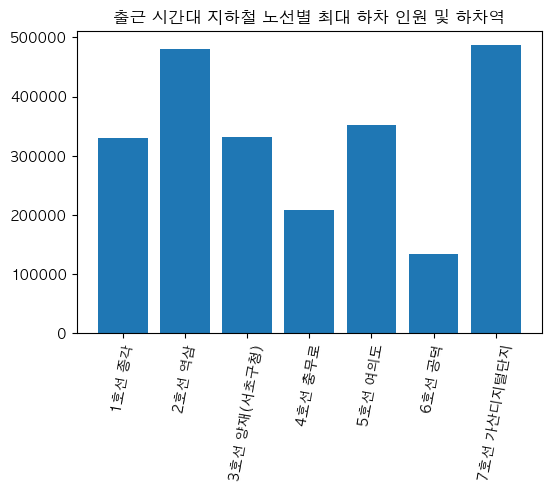

In [341]:
import matplotlib.pyplot as plt

print('출근 시간대 {0}호선 최대 하차역은 {1}역이고 하차인원은 {2:,}명 입니다.'.format(subDF_c_1_1.iloc[0], subDF_c_1_1.iloc[1],
                                                              subDF_c_1_1.iloc[2]))
print('출근 시간대 {0}호선 최대 하차역은 {1}역이고 하차인원은 {2:,}명 입니다.'.format(subDF_c_2_1.iloc[0], subDF_c_2_1.iloc[1],
                                                              subDF_c_2_1.iloc[2]))
print('출근 시간대 {0}호선 최대 하차역은 {1}역이고 하차인원은 {2:,}명 입니다.'.format(subDF_c_3_1.iloc[0], subDF_c_3_1.iloc[1],
                                                              subDF_c_3_1.iloc[2]))
print('출근 시간대 {0}호선 최대 하차역은 {1}역이고 하차인원은 {2:,}명 입니다.'.format(subDF_c_4_1.iloc[0], subDF_c_4_1.iloc[1],
                                                              subDF_c_4_1.iloc[2]))
print('출근 시간대 {0}호선 최대 하차역은 {1}역이고 하차인원은 {2:,}명 입니다.'.format(subDF_c_5_1.iloc[0], subDF_c_5_1.iloc[1],
                                                              subDF_c_5_1.iloc[2]))
print('출근 시간대 {0}호선 최대 하차역은 {1}역이고 하차인원은 {2:,}명 입니다.'.format(subDF_c_6_1.iloc[0], subDF_c_6_1.iloc[1],
                                                              subDF_c_6_1.iloc[2]))
print('출근 시간대 {0}호선 최대 하차역은 {1}역이고 하차인원은 {2:,}명 입니다.'.format(subDF_c_7_1.iloc[0], subDF_c_7_1.iloc[1],
                                                              subDF_c_7_1.iloc[2]))

plt.figure(dpi=100)

plt.title("출근 시간대 지하철 노선별 최대 하차 인원 및 하차역")
plt.bar(x_1, y_1)
# plt.bar(range(len(a)), a)
plt.xticks(rotation=80)
plt.show()